# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

# Download Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# See the Shape of Dataset

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

# See the Samples of Dataset

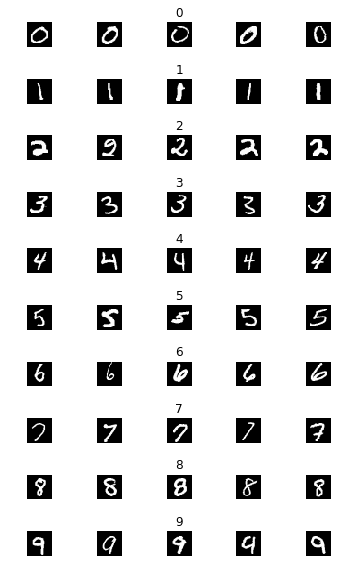

In [6]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

# Visualize Data

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

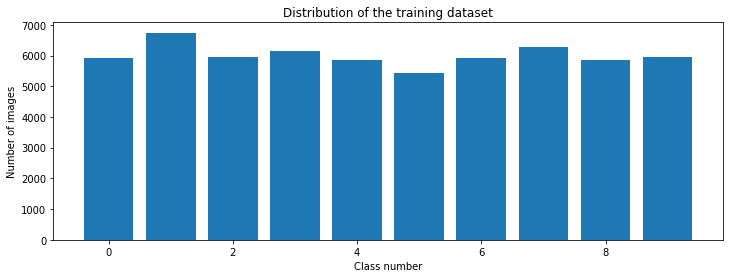

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

# One Hot Encoding

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalization

In [0]:
X_train = X_train/255 
X_test = X_test/255

# Reshape Dataset

In [0]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = create_model()
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.6332 - acc: 0.8055 - val_loss: 0.3218 - val_acc: 0.9032
Epoch 2/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.3815 - acc: 0.8905 - val_loss: 0.2858 - val_acc: 0.9170
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.3384 - acc: 0.9007 - val_loss: 0.2820 - val_acc: 0.9133
Epoch 4/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3262 - acc: 0.9040 - val_loss: 0.2717 - val_acc: 0.9170
Epoch 5/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3129 - acc: 0.9072 - val_loss: 0.2753 - val_acc: 0.9170
Epoch 6/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.3014 - acc: 0.9113 - val_loss: 0.2686 - val_acc: 0.9202
Epoch 7/10
54000/54000 [===========

Text(0.5, 0, 'epoch')

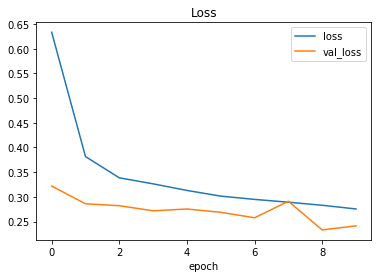

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

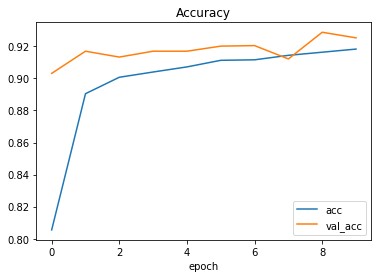

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3023819127306342
Test accuracy: 0.912


In [0]:
import requests
from PIL import Image
import cv2

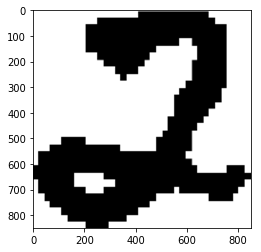

In [18]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(28, 28, 4)


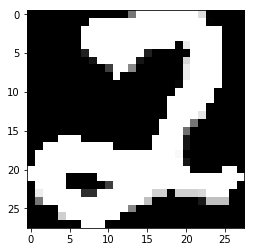

In [19]:
img_array = np.array(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(gray_scale)
plt.imshow(img, cmap=plt.get_cmap('gray'))
print(resized.shape)

In [0]:
img = img/255
img = img.reshape(1, 784)

In [21]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [6]
